In [1]:
import matplotlib.pyplot as plt

## 使用 ggplot 風格

In [2]:
plt.style.use('ggplot')

##  %matplotlin inline lead to static images embeded in the notebook

In [3]:
%matplotlib inline

## 更改全部中文字體

## 中文字體: DFKai-SB(win10), Microsoft YaHei (Win7) 
##  Microsoft MHei(Windows), SimHei (Mac) 

In [4]:
plt.rcParams['font.family']='DFKai-SB'

## Project example :
## 新竹市不動產實價登錄資訊-買賣案件
## https://data.gov.tw/dataset/67502
## 鄉鎮市區、交易標的、土地區段位置/建物區段門牌、土地移轉總面積[平方公尺]、使用分區或編定、非都市土地使用分區、非都市土地使用地、交易年月、交易筆棟數、移轉層次、總樓層數、建物型態、主要用途、主要建材、建築完成年月、建物移轉總面積[平方公尺]、現況格局-房、現況格局-廳、現況格局-衛、現況格局-隔間、有無管理組織、總價[元]、單價[元/平方公尺]、車位...¶

In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv("hsin.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 27 columns):
P1LA_CF46         42881 non-null object
P1MA_CASEFLAG     43456 non-null object
P1MA_DD09         43456 non-null object
P1LA_CArea        43456 non-null float64
P1LA_C11_1        37214 non-null object
P1LA_C12_1        5986 non-null object
P1LA_C12_2        5794 non-null object
(沒有資料行名稱)         43456 non-null int64
(沒有資料行名稱)1        43456 non-null object
P1JD_14_1         36516 non-null object
P1LA_F13          37664 non-null object
P1MA_BUILD5       43456 non-null object
P1LA_F11          37566 non-null object
P1LA_F12          37659 non-null object
(沒有資料行名稱)2        35754 non-null float64
P1LA_FArea        43456 non-null float64
P1MA_BUILD1       35252 non-null object
P1MA_BUILD2       34042 non-null object
P1MA_BUILD3       35494 non-null object
P1MA_BUILD4       43456 non-null object
P1MA_MANAGE       43456 non-null object
P1MA_TOTPRICE     43456 non-null int64
MeanPrice   

## 看一下 first five rows

In [8]:
df[:5]

,P1LA_CF46,P1MA_CASEFLAG,P1MA_DD09,P1LA_CArea,P1LA_C11_1,P1LA_C12_1,P1LA_C12_2,(沒有資料行名稱),(沒有資料行名稱)1,P1JD_14_1,...,P1MA_BUILD2,P1MA_BUILD3,P1MA_BUILD4,P1MA_MANAGE,P1MA_TOTPRICE,MeanPrice,P1PA_PARK_1,P1PA_PARKAREA,P1PA_PARKPRICE,P1MA_NOTE
0,香山區,地+建,牛埔北路１９６巷1～30號,351.436,NaN,鄉村區,乙建351.436,10107,土地2建物1,A一層=49.29，二層=65.57,...,1廳,1衛,有隔間,無管理組織,8500000,244638,NaN,0.00,0,權利人有二人
1,東區,地+建,建功一路５３巷1～30號,22.200,住22.2,NaN,NaN,10106,土地1建物1,A三層=75.90,...,2廳,1衛,有隔間,無管理組織,5408000,235543,NaN,0.00,0,無
2,東區,土地,前溪段151～180地號,769.753,農769.753,特定農業區,NaN,10107,土地1,NaN,...,NaN,NaN,有隔間,無管理組織,13770000,59137,NaN,0.00,0,無
3,東區,地+建+車,中央路２４５巷31～60號,9.485,住9.485,NaN,NaN,10106,土地1建物1車位1,A四層=40.07,...,1廳,1衛,有隔間,有管理組織,6900000,260953,坡道平面,34.81,1450000,無
4,香山區,地+建,至善街３１巷1～30號,14.698,NaN,山坡地保育區,丙建14.698,10107,土地2建物1,A四層=17.00,...,NaN,1衛,有隔間,有管理組織,520000,60545,NaN,0.00,0,無


## 用 df.loc  看一下 其他 columns

In [10]:
# 前5列,    第(沒有資料行名稱)欄 ~ P1MA_BUILD2欄
df.loc[:5,"(沒有資料行名稱)":"P1MA_BUILD2"]

,(沒有資料行名稱),(沒有資料行名稱)1,P1JD_14_1,P1LA_F13,P1MA_BUILD5,P1LA_F11,P1LA_F12,(沒有資料行名稱)2,P1LA_FArea,P1MA_BUILD1,P1MA_BUILD2
0,10107,土地2建物1,A一層=49.29，二層=65.57,2層,透天厝,住家用,加強磚造,7209.0,114.860,3房,1廳
1,10106,土地1建物1,A三層=75.90,3層,公寓,國民住宅,鋼筋混凝土造,NaN,75.900,3房,2廳
2,10107,土地1,NaN,NaN,土地,NaN,NaN,NaN,0.000,NaN,NaN
3,10106,土地1建物1車位1,A四層=40.07,11層,套房,見其他登記事項，共同使用部份,鋼筋混凝土造,10102.0,103.851,1房,1廳
4,10107,土地2建物1,A四層=17.00,10層,套房,住家用，見其他登記事項,鋼筋混凝土造,8705.0,28.392,1房,NaN
5,10106,土地1建物1,A一層=55.20，二層=55.20,2層,透天厝,住家用,加強磚造,7106.0,110.400,4房,2廳


## 取有興趣的欄位

In [11]:
dfmo=df[["P1LA_CF46","(沒有資料行名稱)2","P1LA_FArea","P1MA_BUILD1","P1MA_BUILD2","P1MA_BUILD3","P1MA_TOTPRICE","P1MA_BUILD5" ]]

In [12]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 8 columns):
P1LA_CF46        42881 non-null object
(沒有資料行名稱)2       35754 non-null float64
P1LA_FArea       43456 non-null float64
P1MA_BUILD1      35252 non-null object
P1MA_BUILD2      34042 non-null object
P1MA_BUILD3      35494 non-null object
P1MA_TOTPRICE    43456 non-null int64
P1MA_BUILD5      43456 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.7+ MB


In [13]:
dfmo[:5]

,P1LA_CF46,(沒有資料行名稱)2,P1LA_FArea,P1MA_BUILD1,P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,P1MA_BUILD5
0,香山區,7209.0,114.860,3房,1廳,1衛,8500000,透天厝
1,東區,NaN,75.900,3房,2廳,1衛,5408000,公寓
2,東區,NaN,0.000,NaN,NaN,NaN,13770000,土地
3,東區,10102.0,103.851,1房,1廳,1衛,6900000,套房
4,香山區,8705.0,28.392,1房,NaN,1衛,520000,套房


## examine the raw underling data array

In [14]:
dfmo.values

array([['香山區', 7209.0, 114.86, ..., '1衛', 8500000, '透天厝'],
       ['東區', nan, 75.9, ..., '1衛', 5408000, '公寓'],
       ['東區', nan, 0.0, ..., nan, 13770000, '土地'],
       ...,
       ['北區', nan, 0.0, ..., nan, 5793523, '土地'],
       ['香山區', nan, 0.0, ..., nan, 2880001, '土地'],
       ['北區', nan, 103.5, ..., '2衛', 8500000, '透天厝']], dtype=object)

In [16]:
dfmo_array=dfmo.values
print(type(dfmo_array))
print((dfmo_array.ndim))

<class 'numpy.ndarray'>
2


## 用 value_counts() 去看有哪些,及有多少個.

In [17]:
dfmo["P1LA_CF46"].value_counts()

東區     23329
北區     12013
香山區     7539
Name: P1LA_CF46, dtype: int64

In [18]:
23329+12013+7539

42881

In [19]:
dfmo["P1MA_BUILD5"].value_counts()

住宅大樓      17158
透天厝        6448
華廈         6065
土地         5776
套房         3340
公寓         2551
店面          747
車位          624
辦公商業大樓      519
其他           70
廠辦           63
工廠           57
農舍           37
倉庫            1
Name: P1MA_BUILD5, dtype: int64

## 修改欄位名稱

In [20]:
dfmo=dfmo.rename(columns={'P1LA_CF46':'鄉鎮市區', 
                          '(沒有資料行名稱)2':'建築完成年月',
                          'P1LA_FArea':'建物移轉總面積[平方公尺]',
                           "P1MA_BUILD5":'建物型態'})
dfmo[:6]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD1,P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態
0,香山區,7209.0,114.860,3房,1廳,1衛,8500000,透天厝
1,東區,NaN,75.900,3房,2廳,1衛,5408000,公寓
2,東區,NaN,0.000,NaN,NaN,NaN,13770000,土地
3,東區,10102.0,103.851,1房,1廳,1衛,6900000,套房
4,香山區,8705.0,28.392,1房,NaN,1衛,520000,套房
5,東區,7106.0,110.400,4房,2廳,1衛,5428000,透天厝


## 其中 欄位資料 有  Nan !! 表示有  missing value (遺失值) !!
## missing data : NaN (Not a number) ,  type(Nan) is float 
## 用 series.isnull 找遺失值

In [21]:
# 找 鄉鎮市區 欄位 中遺失值所在處
data_room=dfmo['鄉鎮市區']
# 用 df.isnull()找遺失值所在
ck=data_room.isnull()
cnt=0
row=0
location=[]# 找出 Nan 在哪一筆資料
for item in ck:
    if item:
        cnt=cnt+1
        location.append(row)
    row=row+1
print("鄉鎮市區共有 NaN : ",cnt)
#print("Nan 位置在:",location)
#dfmo['鄉鎮市區'][60:70]

鄉鎮市區共有 NaN :  575


In [22]:
print(dfmo.loc[2,"P1MA_BUILD1"])
type(dfmo.loc[2,"P1MA_BUILD1"])

nan


float

In [23]:
print(dfmo.iloc[2,3])
type(dfmo.iloc[2,3])

nan


float

In [24]:
dfmo.iloc[2,3]  is    dfmo.loc[2,"P1MA_BUILD1"]

True

In [25]:
data_room=dfmo['P1MA_BUILD1']
ck=data_room.isnull()
cnt=0
row=0
location=[]# 找出 Nan 在哪一筆資料
for item in ck:
    if item:
        cnt=cnt+1
        location.append(row)
    row=row+1
print("P1MA_BUILD1  共有 NaN:",cnt)
#print("Nan 位置在:",location)
#dfmo['鄉鎮市區'][60:70]

P1MA_BUILD1  共有 NaN: 8204


## 有 data,  其type 為 str.   若無data, missing value :Nan,  type 為 float 
## 看一下 row index=5 , 欄位:"P1MA_BUILD1"  

In [26]:
print(dfmo.loc[5,"P1MA_BUILD1"])
type(dfmo.loc[5,"P1MA_BUILD1"])

4房


str

## 如何 將  string:'4房' 中 的 4 取出 轉為 int 呢?

In [27]:
dfmo.loc[5,"P1MA_BUILD1"][0:-1]

'4'

In [28]:
int(dfmo.loc[5,"P1MA_BUILD1"][0:-1])

4

In [29]:
## review string sliceing 

In [30]:
a='3erq房'

In [31]:
a=a[0:-1]

In [32]:
a

'3erq'

In [33]:
len(dfmo['P1MA_BUILD1'])

43456

In [34]:
total_num_row=len(dfmo['P1MA_BUILD1'])
total_num_row

43456

In [35]:
count=0
t_room=[] # 空 list 
for i in range(total_num_row):
    if isinstance(dfmo.loc[i,"P1MA_BUILD1"],str):             # 如果 為 str 即有真正資料
        t_room.append( int(dfmo.loc[i,"P1MA_BUILD1"][0:-1]) ) # 轉成 int 再用 append 加進  list   
        count=count+1
    else:# 為 Nan 
        t_room.append( 0 )
print("The  P1MA_BUILD1 column has  ",count, " 筆non-null 資料", "and has ", total_num_row-count,"NaN(空資料)")
print("total data:",total_num_row )

The  P1MA_BUILD1 column has   35252  筆non-null 資料 and has  8204 NaN(空資料)
total data: 43456


In [36]:
t_room[:10]

[3, 3, 0, 1, 1, 4, 1, 1, 1, 4]

## add a column, 加一新欄位

In [37]:
print(type(t_room))
print(len(t_room))

<class 'list'>
43456


In [38]:
dfmo['現況格局-房']=t_room

In [39]:
dfmo[:5]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD1,P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房
0,香山區,7209.0,114.860,3房,1廳,1衛,8500000,透天厝,3
1,東區,NaN,75.900,3房,2廳,1衛,5408000,公寓,3
2,東區,NaN,0.000,NaN,NaN,NaN,13770000,土地,0
3,東區,10102.0,103.851,1房,1廳,1衛,6900000,套房,1
4,香山區,8705.0,28.392,1房,NaN,1衛,520000,套房,1


In [40]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 9 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
P1MA_BUILD1      35252 non-null object
P1MA_BUILD2      34042 non-null object
P1MA_BUILD3      35494 non-null object
P1MA_TOTPRICE    43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.0+ MB


## 比較 現況格局- 房 與 P1MA_BUILD1 欄位 : 是 否轉成 int 成功 ?
## 刪除 P1MA_BUILD1 欄位 

In [41]:
dfmo=dfmo.drop('P1MA_BUILD1',axis=1)

In [42]:
dfmo[:10]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房
0,香山區,7209.0,114.860,1廳,1衛,8500000,透天厝,3
1,東區,NaN,75.900,2廳,1衛,5408000,公寓,3
2,東區,NaN,0.000,NaN,NaN,13770000,土地,0
3,東區,10102.0,103.851,1廳,1衛,6900000,套房,1
4,香山區,8705.0,28.392,NaN,1衛,520000,套房,1
5,東區,7106.0,110.400,2廳,1衛,5428000,透天厝,4
6,東區,10102.0,65.804,1廳,1衛,5300000,套房,1
7,東區,10102.0,65.804,1廳,1衛,5630000,套房,1
8,東區,10102.0,88.335,1廳,1衛,6550000,套房,1
9,東區,5912.0,72.000,1廳,2衛,5100000,透天厝,4


## 換轉 P1MA_BUILD2 ( 現況格局-廳  ) 成為 int  

In [43]:
total_num_row=len(dfmo['P1MA_BUILD2'])
total_num_row

43456

In [44]:
count=0
t_living_room=[]
for i in range(total_num_row):
    if isinstance(dfmo.loc[i,"P1MA_BUILD2"],str):# 如果 為 str 即有真正資料
        t_living_room.append( int(dfmo.loc[i,"P1MA_BUILD2"][0:-1]) )
        count=count+1
    else:# 為 Nan 
        t_living_room.append( 0 )
print("The  P1MA_BUILD2  column has  ",count, " 筆資料", "and has ", total_num_row-count,"NaN(空資料)")
print("total data:",total_num_row )

The  P1MA_BUILD2  column has   34042  筆資料 and has  9414 NaN(空資料)
total data: 43456


In [45]:
t_living_room[:10]

[1, 2, 0, 1, 0, 2, 1, 1, 1, 1]

In [46]:
len(t_living_room)

43456

## 新增欄位 : 現況格局-廳

In [47]:
dfmo['現況格局-廳']=t_living_room

In [48]:
dfmo[:10]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳
0,香山區,7209.0,114.860,1廳,1衛,8500000,透天厝,3,1
1,東區,NaN,75.900,2廳,1衛,5408000,公寓,3,2
2,東區,NaN,0.000,NaN,NaN,13770000,土地,0,0
3,東區,10102.0,103.851,1廳,1衛,6900000,套房,1,1
4,香山區,8705.0,28.392,NaN,1衛,520000,套房,1,0
5,東區,7106.0,110.400,2廳,1衛,5428000,透天厝,4,2
6,東區,10102.0,65.804,1廳,1衛,5300000,套房,1,1
7,東區,10102.0,65.804,1廳,1衛,5630000,套房,1,1
8,東區,10102.0,88.335,1廳,1衛,6550000,套房,1,1
9,東區,5912.0,72.000,1廳,2衛,5100000,透天厝,4,1


In [49]:
dfmo=dfmo.drop('P1MA_BUILD2',axis=1)

In [50]:
dfmo[:5]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳
0,香山區,7209.0,114.860,1衛,8500000,透天厝,3,1
1,東區,NaN,75.900,1衛,5408000,公寓,3,2
2,東區,NaN,0.000,NaN,13770000,土地,0,0
3,東區,10102.0,103.851,1衛,6900000,套房,1,1
4,香山區,8705.0,28.392,1衛,520000,套房,1,0


## 換轉 P1MA_BUILD3 ( 現況格局-衛) 成為 int

In [51]:
total_num_row=len(dfmo['P1MA_BUILD3'])
total_num_row

43456

In [52]:
count=0
t_bath_room=[]
for i in range(total_num_row):
    if isinstance(dfmo.loc[i,"P1MA_BUILD3"],str):# 如果 為 str 即有真正資料
        t_bath_room.append( int(dfmo.loc[i,"P1MA_BUILD3"][0:-1]) )
        count=count+1
    else:# 為 Nan 
        t_bath_room.append( 0 )
print("The  P1MA_BUILD3  column has  ",count, " 筆資料", "and has ", total_num_row-count,"NaN(空資料)")
print("total data:",total_num_row )

The  P1MA_BUILD3  column has   35494  筆資料 and has  7962 NaN(空資料)
total data: 43456


In [53]:
print( t_bath_room[:10] ) 
print(len(t_bath_room) )
dfmo['現況格局-衛']=t_bath_room

[1, 1, 0, 1, 1, 1, 1, 1, 1, 2]
43456


In [54]:
dfmo[:10]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳,現況格局-衛
0,香山區,7209.0,114.860,1衛,8500000,透天厝,3,1,1
1,東區,NaN,75.900,1衛,5408000,公寓,3,2,1
2,東區,NaN,0.000,NaN,13770000,土地,0,0,0
3,東區,10102.0,103.851,1衛,6900000,套房,1,1,1
4,香山區,8705.0,28.392,1衛,520000,套房,1,0,1
5,東區,7106.0,110.400,1衛,5428000,透天厝,4,2,1
6,東區,10102.0,65.804,1衛,5300000,套房,1,1,1
7,東區,10102.0,65.804,1衛,5630000,套房,1,1,1
8,東區,10102.0,88.335,1衛,6550000,套房,1,1,1
9,東區,5912.0,72.000,2衛,5100000,透天厝,4,1,2


In [55]:
dfmo=dfmo.drop('P1MA_BUILD3',axis=1)

In [56]:
dfmo[:5]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳,現況格局-衛
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1
1,東區,NaN,75.900,5408000,公寓,3,2,1
2,東區,NaN,0.000,13770000,土地,0,0,0
3,東區,10102.0,103.851,6900000,套房,1,1,1
4,香山區,8705.0,28.392,520000,套房,1,0,1


In [57]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 8 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
P1MA_TOTPRICE    43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
現況格局-廳           43456 non-null int64
現況格局-衛           43456 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.7+ MB


## 修改欄位名稱

In [58]:
dfmo=dfmo.rename(      columns={  'P1MA_TOTPRICE'  :  '總價[元]'  }     )
dfmo[:10]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],總價[元],建物型態,現況格局-房,現況格局-廳,現況格局-衛
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1
1,東區,NaN,75.900,5408000,公寓,3,2,1
2,東區,NaN,0.000,13770000,土地,0,0,0
3,東區,10102.0,103.851,6900000,套房,1,1,1
4,香山區,8705.0,28.392,520000,套房,1,0,1
5,東區,7106.0,110.400,5428000,透天厝,4,2,1
6,東區,10102.0,65.804,5300000,套房,1,1,1
7,東區,10102.0,65.804,5630000,套房,1,1,1
8,東區,10102.0,88.335,6550000,套房,1,1,1
9,東區,5912.0,72.000,5100000,透天厝,4,1,2


In [59]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 8 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
總價[元]            43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
現況格局-廳           43456 non-null int64
現況格局-衛           43456 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.7+ MB


In [60]:
dfmo.describe()

,建築完成年月,建物移轉總面積[平方公尺],總價[元],現況格局-房,現況格局-廳,現況格局-衛
count,35754.000000,43456.000000,4.345600e+04,43456.00000,43456.000000,43456.000000
mean,9434.007244,153.013497,1.095019e+07,2.65121,1.471488,1.848237
std,1145.957581,549.742850,2.901826e+07,2.26749,0.966171,2.014332
min,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,8605.000000,72.120000,4.250000e+06,1.00000,1.000000,1.000000
50%,9908.000000,140.680000,7.750000e+06,3.00000,2.000000,2.000000
75%,10305.000000,196.956000,1.306000e+07,4.00000,2.000000,2.000000
max,77101.000000,70414.550000,3.310000e+09,88.00000,58.000000,88.000000


In [61]:
dfmo["總價[百萬元]"]=dfmo["總價[元]"]/1000000

In [62]:
dfmo[:15]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],總價[元],建物型態,現況格局-房,現況格局-廳,現況格局-衛,總價[百萬元]
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1,8.500
1,東區,NaN,75.900,5408000,公寓,3,2,1,5.408
2,東區,NaN,0.000,13770000,土地,0,0,0,13.770
3,東區,10102.0,103.851,6900000,套房,1,1,1,6.900
4,香山區,8705.0,28.392,520000,套房,1,0,1,0.520
5,東區,7106.0,110.400,5428000,透天厝,4,2,1,5.428
6,東區,10102.0,65.804,5300000,套房,1,1,1,5.300
7,東區,10102.0,65.804,5630000,套房,1,1,1,5.630
8,東區,10102.0,88.335,6550000,套房,1,1,1,6.550
9,東區,5912.0,72.000,5100000,透天厝,4,1,2,5.100


In [63]:
print(dfmo.loc[1,"建築完成年月"])
type(dfmo.loc[1,"建築完成年月"])

nan


numpy.float64

In [64]:
print(dfmo.loc[3,"建築完成年月"])
type(dfmo.loc[3,"建築完成年月"])

10102.0


numpy.float64

In [65]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 9 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
總價[元]            43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
現況格局-廳           43456 non-null int64
現況格局-衛           43456 non-null int64
總價[百萬元]          43456 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB


## 刪除所有 Nan 的列 

In [66]:
dfmo1=dfmo.dropna()

In [67]:
dfmo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35586 entries, 0 to 43448
Data columns (total 9 columns):
鄉鎮市區             35586 non-null object
建築完成年月           35586 non-null float64
建物移轉總面積[平方公尺]    35586 non-null float64
總價[元]            35586 non-null int64
建物型態             35586 non-null object
現況格局-房           35586 non-null int64
現況格局-廳           35586 non-null int64
現況格局-衛           35586 non-null int64
總價[百萬元]          35586 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.7+ MB


In [68]:
dfmo1[:20]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],總價[元],建物型態,現況格局-房,現況格局-廳,現況格局-衛,總價[百萬元]
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1,8.500
3,東區,10102.0,103.851,6900000,套房,1,1,1,6.900
4,香山區,8705.0,28.392,520000,套房,1,0,1,0.520
5,東區,7106.0,110.400,5428000,透天厝,4,2,1,5.428
6,東區,10102.0,65.804,5300000,套房,1,1,1,5.300
7,東區,10102.0,65.804,5630000,套房,1,1,1,5.630
8,東區,10102.0,88.335,6550000,套房,1,1,1,6.550
9,東區,5912.0,72.000,5100000,透天厝,4,1,2,5.100
11,東區,6701.0,112.940,9300000,透天厝,3,2,2,9.300
12,北區,7909.0,35.173,900000,套房,1,0,1,0.900


# 重設 index 

In [69]:
dfmo1=dfmo1.reset_index(drop=True) 

In [70]:
dfmo1[0:20] 

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],總價[元],建物型態,現況格局-房,現況格局-廳,現況格局-衛,總價[百萬元]
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1,8.500
1,東區,10102.0,103.851,6900000,套房,1,1,1,6.900
2,香山區,8705.0,28.392,520000,套房,1,0,1,0.520
3,東區,7106.0,110.400,5428000,透天厝,4,2,1,5.428
4,東區,10102.0,65.804,5300000,套房,1,1,1,5.300
5,東區,10102.0,65.804,5630000,套房,1,1,1,5.630
6,東區,10102.0,88.335,6550000,套房,1,1,1,6.550
7,東區,5912.0,72.000,5100000,透天厝,4,1,2,5.100
8,東區,6701.0,112.940,9300000,透天厝,3,2,2,9.300
9,北區,7909.0,35.173,900000,套房,1,0,1,0.900


In [82]:
dfmo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35586 entries, 0 to 35585
Data columns (total 9 columns):
鄉鎮市區             35586 non-null object
建築完成年月           35586 non-null float64
建物移轉總面積[平方公尺]    35586 non-null float64
總價[元]            35586 non-null int64
建物型態             35586 non-null object
現況格局-房           35586 non-null int64
現況格局-廳           35586 non-null int64
現況格局-衛           35586 non-null int64
總價[百萬元]          35586 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.4+ MB


## 分析：每年新竹 （~民國107年 ) 每年每月買賣不動產建築之數目是多少?
## 還記得 groupy ?

In [72]:
dfmo1.groupby('建築完成年月')[['建物型態']].count()

,建物型態
建築完成年月,
0.0,1
1.0,13
103.0,2
1811.0,1
2204.0,3
3107.0,2
3401.0,1
3806.0,1
4108.0,1


In [73]:
date_room=dfmo1['建築完成年月']
cnt=0
row=0
location=[]# 找出哪一筆資料
for item in date_room:
    if item==0.0 or item==1.0 or item==77101.0 or item==103.0:
        cnt=cnt+1
        location.append(row)
    row=row+1
print("共有 :",cnt, " strange data !! ")
print("strange data 位置在:",location)
#dfmo['鄉鎮市區'][60:70]

共有 : 17  strange data !! 
strange data 位置在: [507, 7714, 10488, 12522, 13026, 17015, 18049, 19231, 19890, 20749, 21653, 23962, 26843, 30866, 30867, 33298, 34606]


## 刪除 strange data !! 

In [74]:
dfmo1=dfmo1.drop(location)

In [75]:
dfmo1=dfmo1.reset_index(drop=True) 

In [103]:
dfmo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35569 entries, 0 to 35568
Data columns (total 9 columns):
鄉鎮市區             35569 non-null object
建築完成年月           35569 non-null float64
建物移轉總面積[平方公尺]    35569 non-null float64
總價[元]            35569 non-null int64
建物型態             35569 non-null object
現況格局-房           35569 non-null int64
現況格局-廳           35569 non-null int64
現況格局-衛           35569 non-null int64
總價[百萬元]          35569 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.4+ MB


In [104]:
dfmo1.describe()

,建築完成年月,建物移轉總面積[平方公尺],總價[元],現況格局-房,現況格局-廳,現況格局-衛,總價[百萬元]
count,35569.000000,35569.000000,3.556900e+04,35569.000000,35569.000000,35569.000000,35569.000000
mean,9437.059153,170.839023,1.019876e+07,3.046417,1.699457,2.130507,10.198756
std,1069.808574,197.360090,1.170855e+07,2.155859,0.830582,2.012027,11.708554
min,1811.000000,0.061000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8605.000000,107.643000,5.000000e+06,2.000000,1.000000,1.000000,5.000000
50%,9908.000000,157.262000,8.200000e+06,3.000000,2.000000,2.000000,8.200000
75%,10305.000000,210.497000,1.330000e+07,4.000000,2.000000,2.000000,13.300000
max,10701.000000,17841.496000,9.680000e+08,88.000000,58.000000,88.000000,968.000000


## 用 plt.plot to get a feel of the data !!¶

In [105]:
df_data1=dfmo1.groupby('建築完成年月')['建物型態'].count()

In [106]:
print(df_data1)
print(type(df_data1))
#print(type(df_data1.index))
#print(type(df_data1.values))

建築完成年月
1811.0       1
2204.0       3
3107.0       2
3401.0       1
3806.0       1
4108.0       1
4303.0       1
4308.0       1
4401.0       1
4404.0       1
4406.0       1
4407.0       1
4501.0       1
4602.0       1
4612.0       1
4703.0       1
4707.0       2
4712.0       1
4811.0       1
4908.0       3
5007.0       1
5301.0       1
5310.0       1
5401.0       1
5411.0       1
5412.0       1
5502.0       1
5504.0       2
5505.0       1
5506.0       1
          ... 
10407.0    149
10408.0    252
10409.0    223
10410.0    275
10411.0     94
10412.0    771
10501.0    910
10503.0     35
10504.0    188
10505.0    437
10506.0     68
10507.0    204
10508.0     31
10509.0    201
10510.0    124
10511.0     26
10512.0     27
10601.0    166
10602.0     46
10603.0      8
10604.0     27
10605.0     32
10606.0     43
10607.0     29
10608.0     60
10609.0     28
10610.0     85
10611.0     15
10612.0    270
10701.0      2
Name: 建物型態, Length: 608, dtype: int64
<class 'pandas.core.series.Series'>


Text(0,0.5,'買賣不動產建築之數目')

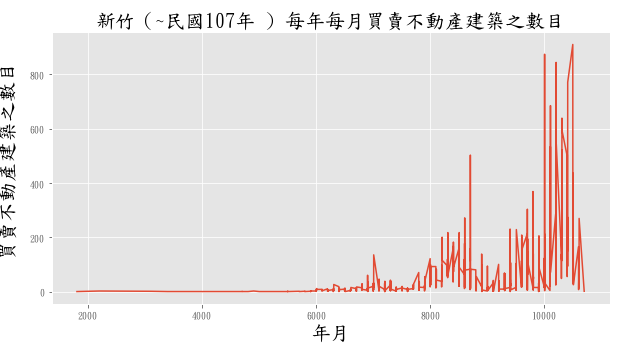

In [107]:
plt.figure(figsize=(10,5))
plt.plot(df_data1.index, df_data1.values )
plt.title('新竹（~民國107年 ) 每年每月買賣不動產建築之數目',color='black',size=20)
plt.xlabel('年月',size=20,color='black')
plt.ylabel('買賣不動產建築之數目',color='black',size=20)

# 用 scatter plot

Text(0,0.5,'買賣不動產建築之數目')

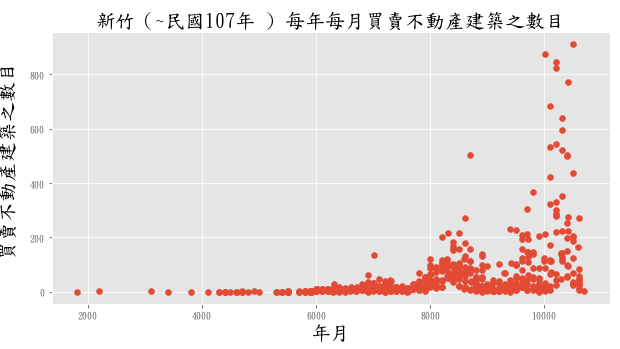

In [108]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_data1.index, y=df_data1.values)
plt.title('新竹（~民國107年 ) 每年每月買賣不動產建築之數目',color='black',size=20)
plt.xlabel('年月',size=20,color='black')
plt.ylabel('買賣不動產建築之數目',color='black',size=20)


## 用 histogram to get a feel of the data !! 

Text(0,0.5,'個數, count')

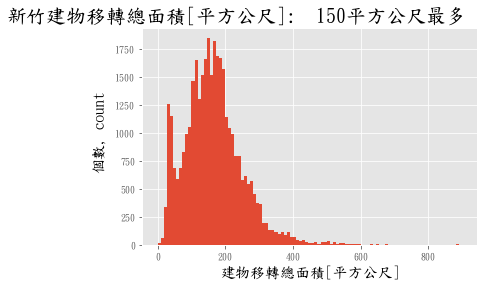

In [112]:
#plt.figure(figsize=(10,5))
bins=np.linspace(0, 900, num=100)
plt.hist(dfmo1['建物移轉總面積[平方公尺]'],bins)


plt.title("新竹建物移轉總面積[平方公尺]:  150平方公尺最多 ",color='black',loc='right',size=20)
plt.xlabel('建物移轉總面積[平方公尺]',size=15,color='black')
plt.ylabel('個數, count',color='black',size=15)
#plt.xlim(0,500)
#plt.ylim(0,2000)

(0, 10)

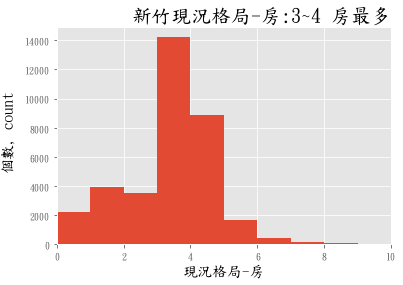

In [114]:
plt.hist(dfmo1['現況格局-房'],bins=list(range(90)))

plt.title("新竹現況格局-房:3~4 房最多",color='black',loc='right',size=20)
plt.xlabel('現況格局-房',size=15,color='black')
plt.ylabel('個數, count',color='black',size=15)
plt.xlim(0,10)

(0, 60)

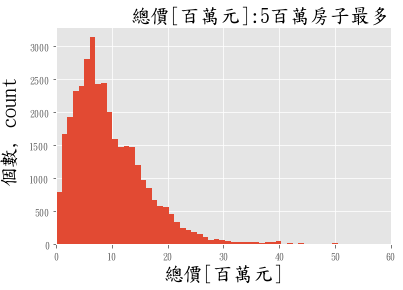

In [116]:
bins=np.linspace(0, 100, num=100)
plt.hist(dfmo1['總價[百萬元]'],bins)

plt.title("總價[百萬元]:5百萬房子最多",color='black',loc='right',size=20)
plt.xlabel('總價[百萬元]',size=20,color='black')
plt.ylabel('個數, count',color='black',size=20)
plt.xlim(0,60)

## 用 scatter plot  畫圖比較欄位之間的相關性

Text(0,0.5,'總價[百萬元]')

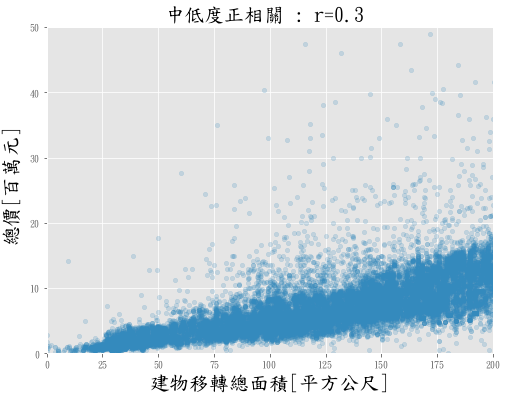

In [117]:
dfmo1.plot(kind='scatter',x='建物移轉總面積[平方公尺]'  ,y='總價[百萬元]' , figsize=(8,6),alpha=0.2)
plt.xlim(0,200)
plt.ylim(0,50)
plt.title('中低度正相關 : r=0.3 ',color='black',size=20)
plt.xlabel('建物移轉總面積[平方公尺]',size=20,color='black')
plt.ylabel('總價[百萬元]',color='black',size=20)

Text(0,0.5,'現況格局-衛')

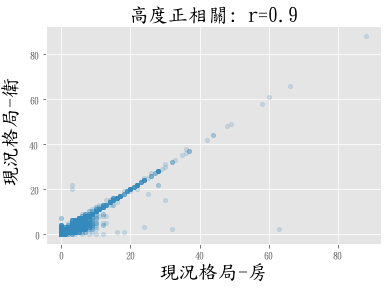

In [118]:
dfmo1.plot(kind='scatter',x='現況格局-房'  ,y='現況格局-衛' , figsize=(6,4),alpha=0.2)
plt.title('高度正相關: r=0.9',color='black',size=20)
plt.xlabel('現況格局-房',size=20,color='black')
plt.ylabel('現況格局-衛',color='black',size=20)

(0, 500)

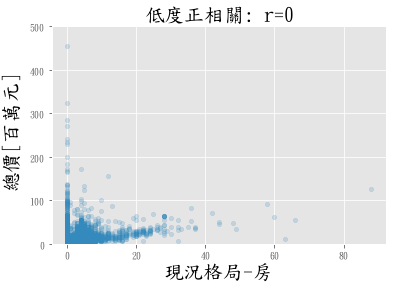

In [119]:
dfmo1.plot(kind='scatter',x='現況格局-房'  ,y='總價[百萬元]' , figsize=(6,4),alpha=0.2)
plt.title('低度正相關: r=0',color='black',size=20)
plt.xlabel('現況格局-房',size=20,color='black')
plt.ylabel('總價[百萬元]',color='black',size=20)
plt.ylim(0,500)

## 取出欲做　correlation coefficient 的欄位

In [120]:
dfmo_conv=dfmo1[["現況格局-房","建物移轉總面積[平方公尺]","現況格局-廳","現況格局-衛","總價[百萬元]"]]

In [121]:
dfmo_conv[:10]

,現況格局-房,建物移轉總面積[平方公尺],現況格局-廳,現況格局-衛,總價[百萬元]
0,3,114.860,1,1,8.500
1,1,103.851,1,1,6.900
2,1,28.392,0,1,0.520
3,4,110.400,2,1,5.428
4,1,65.804,1,1,5.300
5,1,65.804,1,1,5.630
6,1,88.335,1,1,6.550
7,4,72.000,1,2,5.100
8,3,112.940,2,2,9.300
9,1,35.173,0,1,0.900


In [81]:
corr_matrix=dfmo_conv.corr()

In [82]:
print(corr_matrix)

                 現況格局-房  建物移轉總面積[平方公尺]    現況格局-廳    現況格局-衛   總價[百萬元]
現況格局-房         1.000000       0.087764  0.527007  0.909033  0.036570
建物移轉總面積[平方公尺]  0.087764       1.000000  0.067843  0.079066  0.310652
現況格局-廳         0.527007       0.067843  1.000000  0.377910 -0.022321
現況格局-衛         0.909033       0.079066  0.377910  1.000000  0.047050
總價[百萬元]        0.036570       0.310652 -0.022321  0.047050  1.000000
